In [1]:
%matplotlib widget

# Noise analysis [Q + IP]
# and Solution space cross-sections

Date created: 23/04/2024
Author: @mariacarrizo

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../../src')

# Import functions
from EM1D import NoiseAnalysis_GS_2Lay, NoiseAnalysis_GN_2Lay, SolSpa_2Lay_sigma1, SolSpa_2Lay_sigma2
from Plots import Plot_Noise_Analysis, Plot_SolSpa_sigma1, Plot_SolSpa_sigma2

In [3]:
# Load model and data

# True models
model_A2_1 = np.load('models/model_synth_2Lay_A2_1.npy')
model_A2_2 = np.load('models/model_synth_2Lay_A2_2.npy')
model_A2_3 = np.load('models/model_synth_2Lay_A2_3.npy')
model_A2_4 = np.load('models/model_synth_2Lay_A2_4.npy')

# True data
data_A2_1 = np.load('data/data_synth_2Lay_A2_1.npy')
data_A2_2 = np.load('data/data_synth_2Lay_A2_2.npy')
data_A2_3 = np.load('data/data_synth_2Lay_A2_3.npy')
data_A2_4 = np.load('data/data_synth_2Lay_A2_4.npy')

# Estimated data case A2-1 GS
data_A2_1_GS = np.load('data/data_GS_A2_1.npy')

# Load Lookup table
LUT = np.load('../data/LUTable_2Lay.npy')
conds = np.load('../data/conds.npy')
thicks = np.load('../data/thicks.npy')
nsl = len(conds) # sampling number

# Load survey parameters
survey = np.load('../data/survey_2Lay.npy', allow_pickle=True).item()
offsets = survey['offsets']
height = survey['height']
freq = survey['freq']
lambd = survey['lambd']
filt = survey['filt']

# Load estimated model from Global Search
model_GS_A2_1 = np.load('results/model_GS_A2_1.npy')
model_GS_A2_2 = np.load('results/model_GS_A2_2.npy')
model_GS_A2_3 = np.load('results/model_GS_A2_3.npy')
model_GS_A2_4 = np.load('results/model_GS_A2_4.npy')

# Load estimated models from Optimization
model_GN_A2_1 = np.load('results/model_GN_A2_1.npy')
model_GN_A2_2 = np.load('results/model_GN_A2_2.npy')
model_GN_A2_3 = np.load('results/model_GN_A2_3.npy')
model_GN_A2_4 = np.load('results/model_GN_A2_4.npy')

# For example let's check the 1D model following position
pos = 10

In [4]:
# Initial model used for Gauss-Newton inversion
model_ini = np.array([3, 500/1000, 500/1000])

# Load update history of the Gauss-Newton inversion of 1D model in position x=10 m
model_GN_A2_1_hist = np.load('results/model_GN_A2_1_hist.npy')
model_GN_A2_2_hist = np.load('results/model_GN_A2_2_hist.npy')
model_GN_A2_3_hist = np.load('results/model_GN_A2_3_hist.npy')
model_GN_A2_4_hist = np.load('results/model_GN_A2_4_hist.npy')

# Test GS and GN methods with 10% noise in data in 100 instances

In [5]:
# Calculate models in noise analysis with GS
models_noise_GS_A2_1 = NoiseAnalysis_GS_2Lay(LUT, conds, thicks, nsl, data_A2_1[pos])
models_noise_GS_A2_2 = NoiseAnalysis_GS_2Lay(LUT, conds, thicks, nsl, data_A2_2[pos])
models_noise_GS_A2_3 = NoiseAnalysis_GS_2Lay(LUT, conds, thicks, nsl, data_A2_3[pos])
models_noise_GS_A2_4 = NoiseAnalysis_GS_2Lay(LUT, conds, thicks, nsl, data_A2_4[pos])

# Save results
np.save('results/models_noise_GS_A2_1',models_noise_GS_A2_1)
np.save('results/models_noise_GS_A2_2',models_noise_GS_A2_2)
np.save('results/models_noise_GS_A2_3',models_noise_GS_A2_3)
np.save('results/models_noise_GS_A2_4',models_noise_GS_A2_4)

In [6]:
# Calculate models in noise analysis with GN
models_noise_GN_A2_1 = NoiseAnalysis_GN_2Lay(lambd, height, offsets, freq, filt, model_ini, data_A2_1[pos])
models_noise_GN_A2_2 = NoiseAnalysis_GN_2Lay(lambd, height, offsets, freq, filt, model_ini, data_A2_2[pos])
models_noise_GN_A2_3 = NoiseAnalysis_GN_2Lay(lambd, height, offsets, freq, filt, model_ini, data_A2_3[pos])
models_noise_GN_A2_4 = NoiseAnalysis_GN_2Lay(lambd, height, offsets, freq, filt, model_ini, data_A2_4[pos])

# Save results
np.save('results/models_noise_GN_A2_1', models_noise_GN_A2_1)
np.save('results/models_noise_GN_A2_2', models_noise_GN_A2_2)
np.save('results/models_noise_GN_A2_3', models_noise_GN_A2_3)
np.save('results/models_noise_GN_A2_4', models_noise_GN_A2_4)

In [7]:
# Load
models_noise_GS_A2_1 = np.load('results/models_noise_GS_A2_1.npy')
models_noise_GS_A2_2 = np.load('results/models_noise_GS_A2_2.npy')
models_noise_GS_A2_3 = np.load('results/models_noise_GS_A2_3.npy')
models_noise_GS_A2_4 = np.load('results/models_noise_GS_A2_4.npy')

models_noise_GN_A2_1 = np.load('results/models_noise_GN_A2_1.npy')
models_noise_GN_A2_2 = np.load('results/models_noise_GN_A2_2.npy')
models_noise_GN_A2_3 = np.load('results/models_noise_GN_A2_3.npy')
models_noise_GN_A2_4 = np.load('results/models_noise_GN_A2_4.npy')

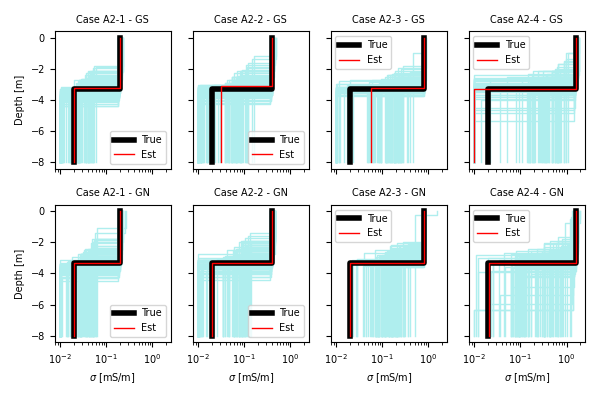

In [8]:
fig, ax = plt.subplots(2,4, sharex=True, sharey=True, figsize=(6,4))
fs=7

Plot_Noise_Analysis(models_noise_GS_A2_1, model_A2_1[pos], model_GS_A2_1[pos], ax=ax[0,0], ylab=True)
ax[0,0].set_title('Case A2-1 - GS', fontsize=fs)
Plot_Noise_Analysis(models_noise_GS_A2_2, model_A2_2[pos], model_GS_A2_2[pos], ax=ax[0,1])
ax[0,1].set_title('Case A2-2 - GS', fontsize=fs)
Plot_Noise_Analysis(models_noise_GS_A2_3, model_A2_3[pos], model_GS_A2_3[pos], ax=ax[0,2])
ax[0,2].set_title('Case A2-3 - GS', fontsize=fs)
Plot_Noise_Analysis(models_noise_GS_A2_4, model_A2_4[pos], model_GS_A2_4[pos], ax=ax[0,3])
ax[0,3].set_title('Case A2-4 - GS', fontsize=fs)

Plot_Noise_Analysis(models_noise_GN_A2_1, model_A2_1[pos], model_GN_A2_1[pos], ax=ax[1,0], ylab=True, xlab=True)
ax[1,0].set_title('Case A2-1 - GN', fontsize=fs)
Plot_Noise_Analysis(models_noise_GN_A2_2, model_A2_2[pos], model_GN_A2_2[pos], ax=ax[1,1], xlab=True)
ax[1,1].set_title('Case A2-2 - GN', fontsize=fs)
Plot_Noise_Analysis(models_noise_GN_A2_3, model_A2_3[pos], model_GN_A2_3[pos], ax=ax[1,2], xlab=True)
ax[1,2].set_title('Case A2-3 - GN', fontsize=fs)
Plot_Noise_Analysis(models_noise_GN_A2_4, model_A2_4[pos], model_GN_A2_4[pos], ax=ax[1,3], xlab=True)
ax[1,3].set_title('Case A2-4 - GN', fontsize=fs)

plt.tight_layout()
#plt.savefig('figures/NoiseAnalysis_CaseA2.eps', format='eps')

# Evaluate solution space 

In [9]:
err_A2_1_s1, models_err_A2_1_s1 = SolSpa_2Lay_sigma1(lambd, height, offsets, freq, filt,
                                                     model_A2_1, data_A2_1, pos, thicks, conds)
err_A2_2_s1, models_err_A2_2_s1 = SolSpa_2Lay_sigma1(lambd, height, offsets, freq, filt,
                                                     model_A2_2, data_A2_2, pos, thicks, conds)
err_A2_3_s1, models_err_A2_3_s1 = SolSpa_2Lay_sigma1(lambd, height, offsets, freq, filt,
                                                     model_A2_3, data_A2_3, pos, thicks, conds)
err_A2_4_s1, models_err_A2_4_s1 = SolSpa_2Lay_sigma1(lambd, height, offsets, freq, filt,
                                                     model_A2_4, data_A2_4, pos, thicks, conds)

err_A2_1_s2, models_err_A2_1_s2 = SolSpa_2Lay_sigma2(lambd, height, offsets, freq, filt,
                                                     model_A2_1, data_A2_1, pos, thicks, conds)
err_A2_2_s2, models_err_A2_2_s2 = SolSpa_2Lay_sigma2(lambd, height, offsets, freq, filt,
                                                     model_A2_2, data_A2_2, pos, thicks, conds)
err_A2_3_s2, models_err_A2_3_s2 = SolSpa_2Lay_sigma2(lambd, height, offsets, freq, filt,
                                                     model_A2_3, data_A2_3, pos, thicks, conds)
err_A2_4_s2, models_err_A2_4_s2 = SolSpa_2Lay_sigma2(lambd, height, offsets, freq, filt,
                                                     model_A2_4, data_A2_4, pos, thicks, conds)

# Plot the Solution Space cross-sections

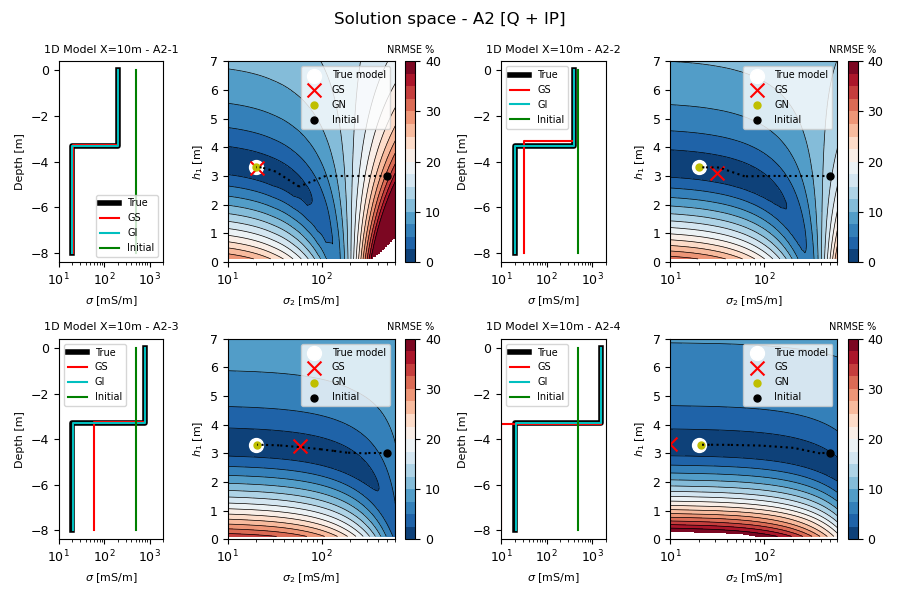

In [13]:
fig, ax = plt.subplots(2,4, figsize=(9,6), gridspec_kw={'width_ratios': [1, 2, 1, 2]})

Plot_SolSpa_sigma1(fig, ax[0,0], ax[0,1], model_A2_1[pos], model_GS_A2_1[pos], model_GN_A2_1[pos], model_ini, model_GN_A2_1_hist, 
                   err_A2_1_s1, models_err_A2_1_s1, pos, case='A2-1', xmin=10, xmax=600)
Plot_SolSpa_sigma1(fig, ax[0,2], ax[0,3], model_A2_2[pos], model_GS_A2_2[pos], model_GN_A2_2[pos], model_ini, model_GN_A2_2_hist, 
                   err_A2_2_s1, models_err_A2_2_s1, pos, case='A2-2', xmin=10, xmax=600)
Plot_SolSpa_sigma1(fig, ax[1,0], ax[1,1], model_A2_3[pos], model_GS_A2_3[pos], model_GN_A2_3[pos], model_ini, model_GN_A2_3_hist,  
                   err_A2_3_s1, models_err_A2_3_s1, pos, case='A2-3', xmin=10, xmax=600)
Plot_SolSpa_sigma1(fig, ax[1,2], ax[1,3], model_A2_4[pos], model_GS_A2_4[pos], model_GN_A2_4[pos], model_ini, model_GN_A2_4_hist,  
                   err_A2_4_s1, models_err_A2_4_s1, pos, case='A2-4', xmin=10, xmax=600)
fig.suptitle('Solution space - A2 [Q + IP]')
plt.tight_layout()
plt.show()
#plt.savefig('figures/ErrorSpace_caseA2.eps', format='eps')

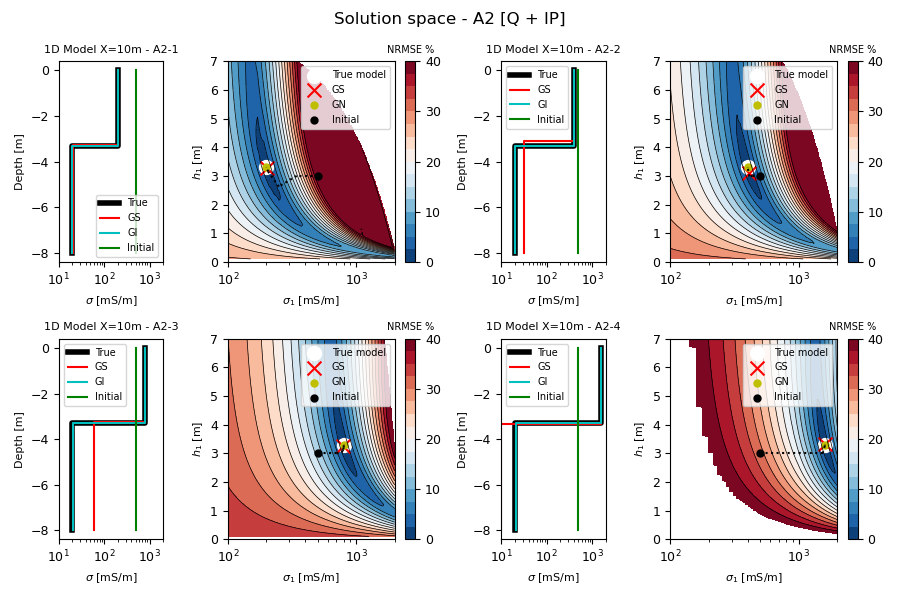

In [15]:
fig, ax = plt.subplots(2,4, figsize=(9,6), gridspec_kw={'width_ratios': [1, 2, 1, 2]})

Plot_SolSpa_sigma2(fig, ax[0,0], ax[0,1], model_A2_1[pos], model_GS_A2_1[pos], model_GN_A2_1[pos], model_ini, model_GN_A2_1_hist, 
                err_A2_1_s2, models_err_A2_1_s2, pos, case='A2-1', xmin=100, xmax=2000)
Plot_SolSpa_sigma2(fig, ax[0,2], ax[0,3], model_A2_2[pos], model_GS_A2_2[pos], model_GN_A2_2[pos], model_ini, model_GN_A2_2_hist, 
                err_A2_2_s2, models_err_A2_2_s2, pos, case='A2-2', xmin=100, xmax=2000)
Plot_SolSpa_sigma2(fig, ax[1,0], ax[1,1], model_A2_3[pos], model_GS_A2_3[pos], model_GN_A2_3[pos], model_ini, model_GN_A2_3_hist, 
                err_A2_3_s2, models_err_A2_3_s2, pos, case='A2-3', xmin=100, xmax=2000)
Plot_SolSpa_sigma2(fig, ax[1,2], ax[1,3], model_A2_4[pos], model_GS_A2_4[pos], model_GN_A2_4[pos], model_ini, model_GN_A2_4_hist, 
                err_A2_4_s2, models_err_A2_4_s2, pos, case='A2-4', xmin=100, xmax=2000)
fig.suptitle('Solution space - A2 [Q + IP]')
plt.tight_layout()
plt.show()
#plt.savefig('figures/ErrorSpace_caseA2.eps', format='eps')